In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from outcome_utilities.clinical_outcome import Clinical_outcome

import warnings
warnings.filterwarnings("ignore")

In [2]:
mrs_dists = pd.read_csv('./outcome_utilities/mrs_dist_probs_cumsum.csv', index_col='Stroke type')
outcome_model = Clinical_outcome(mrs_dists)
time_to_ivt = 120
time_to_mt = 240
outcomes = outcome_model.calculate_outcomes(time_to_ivt, time_to_mt)

In [3]:
outcomes

{'lvo_untreated_cum_probs': array([0.05 , 0.129, 0.265, 0.429, 0.676, 0.811, 1.   ]),
 'nlvo_untreated_cum_probs': array([0.197, 0.46 , 0.58 , 0.708, 0.856, 0.918, 1.   ]),
 'lvo_ivt_cum_probs': array([0.086, 0.172, 0.303, 0.461, 0.683, 0.801, 1.   ]),
 'lvo_mt_cum_probs': array([0.131, 0.247, 0.393, 0.567, 0.764, 0.859, 1.   ]),
 'nlvo_ivt_cum_probs': array([0.345, 0.578, 0.692, 0.81 , 0.909, 0.944, 1.   ]),
 'lvo_untreated_mean_mRS': 3.64,
 'nlvo_untreated_mean_mRS': 2.281,
 'lvo_ivt_mean_mRS': 3.494,
 'lvo_mt_mean_mRS': 3.039,
 'nlvo_ivt_mean_mRS': 1.722,
 'lvo_ivt_mean_shift': -0.146,
 'lvo_mt_mean_shift': -0.601,
 'nlvo_ivt_mean_shift': -0.559,
 'lvo_ivt_improved': 0.156,
 'lvo_mt_improved': 0.599,
 'nlvo_ivt_improved': 0.559}

In [4]:
plt.style.use('seaborn-colorblind')
def draw_horizontal_bar(dist,label=' '):
    """
    Draw a stacked horizontal bar chart of the values in 'dist'.
    
    dist  - list or np.array. The probability distribution 
            (non-cumulative).
    label - string. The name printed next to these stacked bars.
    """
    fig = plt.figure(figsize=(8,2))
    ax = fig.add_subplot()
    ax.set_frame_on(False)
    
    colour_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
    # The first bar will start at this point on the x-axis:
    left = 0
    for i in range(len(dist)):
        # Draw a bar starting from 'left', the end of the previous bar,
        # with a width equal to the probability of this mRS:
        ax.barh(' ', width=dist[i], left=left, height=0.5, 
                 label=f'{i}', edgecolor='k', color=colour_list[i%6])
        # Update 'left' with the width of the current bar so that the 
        # next bar drawn will start in the correct place.    
        left += dist[i]
    ax.set_xlabel('Probability')
    ax.set_title(label)
    ax.legend(loc='center',ncol=7, title='mRS', 
               bbox_to_anchor=[0.5,0.0,0.0,-1.20])   # Legend below axis.

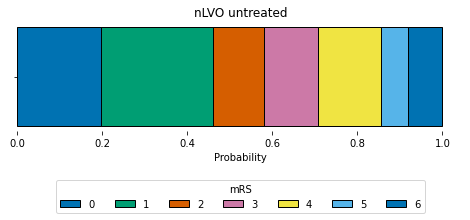

In [5]:
bins = np.diff(outcomes['nlvo_untreated_cum_probs'], prepend=0)
draw_horizontal_bar(bins, 'nLVO untreated')

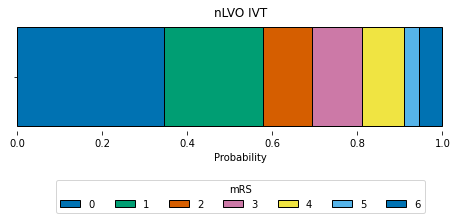

In [6]:
bins = np.diff(outcomes['nlvo_ivt_cum_probs'], prepend=0)
draw_horizontal_bar(bins, 'nLVO IVT')

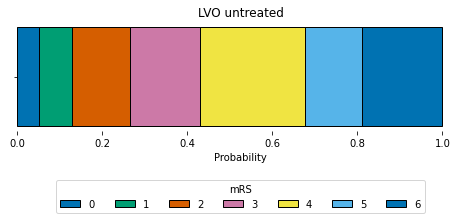

In [7]:
bins = np.diff(outcomes['lvo_untreated_cum_probs'], prepend=0)
draw_horizontal_bar(bins, 'LVO untreated')

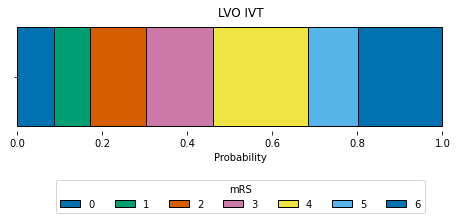

In [8]:
bins = np.diff(outcomes['lvo_ivt_cum_probs'], prepend=0)
draw_horizontal_bar(bins, 'LVO IVT')

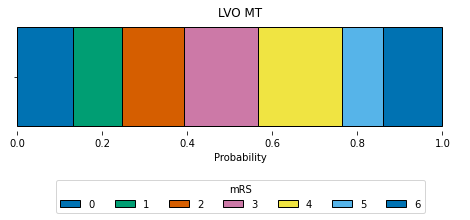

In [9]:
bins = np.diff(outcomes['lvo_mt_cum_probs'], prepend=0)
draw_horizontal_bar(bins, 'LVO MT')